# PCA

## Principal Component Analysis

Objective: Explore Chemical Space of Biofacquim against the world.
           Perform PCA and save output.

Data: ADME descriptors for 5 libraries.
    Libraries:
        AFRODB,
        BIOFACQUIM,
        Epidatabase,
        FDA, 
        PPI,
        
   Descriptors (ADME):
        HBA,
        HBD,
        RB,
        LogP,
        TPSA, 
        MW, 
   
Method: PCA

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

#import seaborn as sns
#import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets, decomposition
from sklearn.preprocessing import StandardScaler

## Open Database

In [3]:
Data = pd.read_csv("Databases_CABANA_2.csv", sep = ",", index_col = "Unnamed: 0")
Data.head()

,ID Database,Name,SMILES,HBA,HBD,RB,LogP,TPSA,MW,Heavy Atom,Ring Count,Fraction CSP3,subLibrary,Library
0,AfroDb.564,NPR_00036,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(OC...,7.0,3.0,51.0,22.4139,105.45,1194.003,85.0,85.0,85.0,AFRODB,AFRODB
1,AfroDb.71,ABD_UD_004,C[C@H](CCC(O[C@H](C[C@@H]([C@@H]1CC2)[C@H]3[C@...,27.0,14.0,18.0,-3.5356,418.89,1195.309,83.0,83.0,83.0,AFRODB,AFRODB
2,AfroDb.70,ABD_UD_003,C[C@H](CC[C@@]([C@H]1C)(OC)O[C@H](C2)[C@H]1[C@...,26.0,14.0,17.0,-2.6588,393.98,1195.353,83.0,83.0,83.0,AFRODB,AFRODB
3,AfroDb.937,WA_0086,COc(cc(/C=C/C(OCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,11.0,3.0,61.0,16.9936,201.42,1117.597,79.0,79.0,79.0,AFRODB,AFRODB
4,AfroDb.936,WA_0085,COc(cc(/C=C/C(OCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,8.0,3.0,52.0,17.0180,122.52,943.489,67.0,67.0,67.0,AFRODB,AFRODB


In [4]:
Data.shape

(21084, 14)

In [5]:
#visualize column names
Data.columns

Index(['ID Database', 'Name', 'SMILES', 'HBA', 'HBD', 'RB', 'LogP', 'TPSA',
       'MW', 'Heavy Atom', 'Ring Count', 'Fraction CSP3', 'subLibrary',
       'Library'],
      dtype='object')

In [7]:
#Identificar librerias
Data.Library.unique()

array(['AFRODB', 'BIOFACQUIM', 'Epidatabase', 'FDA', 'PPI'], dtype=object)

In [4]:
#Identify libraries
Data.Library.unique()

array(['AFRODB', 'BIOFACQUIM', 'Epidatabase', 'FDA', 'PPI'], dtype=object)

## Exploratory Data Analysis

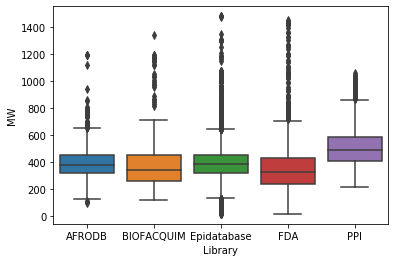

In [11]:
#Plot a Descriptor

Data = Data[Data["MW"] < 1500]
sns.boxplot(x = "Library", y = Data["MW"], data=Data)

In [12]:
#select numerical Data
numerical_descriptors = ['HBA', 'HBD', 'RB','LogP', 'TPSA', 'MW']

In [13]:
#Save Numerical Data into a new DF
numerical_data = Data[numerical_descriptors]

In [8]:
#Statistical values
numerical_data.describe()

,HBA,HBD,RB,LogP,TPSA,MW
count,21084.000000,21084.000000,21084.000000,21084.000000,21084.000000,21084.000000
mean,5.448065,2.389869,6.465282,3.245990,93.442773,409.114843
std,3.443007,2.821554,5.897002,2.235868,75.909175,186.042341
min,0.000000,0.000000,0.000000,-83.666800,0.000000,16.043000
25%,4.000000,1.000000,4.000000,2.238600,64.977500,320.370000
50%,5.000000,2.000000,5.000000,3.296200,83.830000,387.139500
75%,6.000000,3.000000,8.000000,4.312800,106.877500,462.407000
max,191.000000,116.000000,169.000000,22.413900,3038.930000,6179.373000


In [14]:
FDA =  Data[Data["Library"] == "FDA"]
FDA.describe()

,HBA,HBD,RB,LogP,TPSA,MW,Heavy Atom,Ring Count,Fraction CSP3
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,4.944511,2.337709,5.348449,2.200169,88.823126,360.846278,24.806683,24.806683,24.806683
std,3.771048,2.673123,5.280576,2.604306,78.376192,203.876488,14.006339,14.006339,14.006339
min,0.000000,0.000000,0.000000,-19.396500,0.000000,16.043000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,0.725080,41.975000,238.188250,16.000000,16.000000,16.000000
50%,4.000000,2.000000,4.000000,2.471700,71.005000,325.392000,23.000000,23.000000,23.000000
75%,6.000000,3.000000,7.000000,3.850725,107.455000,427.783750,30.000000,30.000000,30.000000
max,51.000000,22.000000,56.000000,12.938000,772.170000,1448.686000,102.000000,102.000000,102.000000


In [21]:
BIO = Data[Data["Library"] == "BIOFACQUIM"]
#BIO.head()
BIO.describe()

,HBA,HBD,RB,LogP,TPSA,MW,Heavy Atom,Ring Count,Fraction CSP3
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,6.234450,2.483254,5.117225,2.992248,98.047871,389.483761,27.952153,27.952153,27.952153
std,5.243478,3.025227,6.141274,2.777187,82.316960,205.842617,14.173221,14.173221,14.173221
min,0.000000,0.000000,0.000000,-5.935100,0.000000,122.123000,9.000000,9.000000,9.000000
25%,3.000000,1.000000,2.000000,1.507200,52.600000,262.272000,19.000000,19.000000,19.000000
50%,5.000000,2.000000,3.000000,2.820860,70.855000,339.389000,24.000000,24.000000,24.000000
75%,7.000000,3.000000,6.000000,3.760065,113.195000,454.213000,33.000000,33.000000,33.000000
max,32.000000,19.000000,31.000000,12.891300,521.430000,1341.448000,92.000000,92.000000,92.000000


In [9]:
#Correlation
Correlation = numerical_data.corr()
Correlation.head()

,HBA,HBD,RB,LogP,TPSA,MW
HBA,1.000000,0.717281,0.677813,-0.349287,0.866372,0.814347
HBD,0.717281,1.000000,0.769447,-0.499214,0.929746,0.709818
RB,0.677813,0.769447,1.000000,-0.160490,0.806619,0.818425
LogP,-0.349287,-0.499214,-0.160490,1.000000,-0.477352,-0.006784
TPSA,0.866372,0.929746,0.806619,-0.477352,1.000000,0.820930


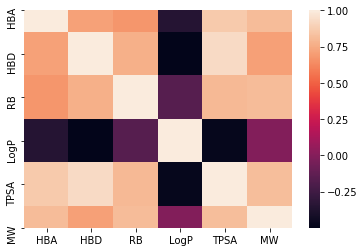

In [10]:
sns.heatmap(numerical_data.corr())
plt.savefig("correlacion_inicial.png")

## Normalize Data

In [23]:
numerical_data = pd.DataFrame(StandardScaler().fit_transform(numerical_data))
# Calculate the principal components using scikit-learn
numerical_data.head()

,0,1,2,3,4,5
0,0.645657,0.401855,11.129015,9.762059,0.330678,5.647060
1,8.383225,6.456207,2.927977,-3.487995,7.063362,5.656373
2,7.996347,6.456207,2.679461,-3.040293,6.528296,5.656687
3,2.193171,0.401855,13.614178,6.994404,2.392111,5.102219
4,1.032535,0.401855,11.377531,7.006863,0.697341,3.860678


In [24]:
sklearn_pca = sklearn.decomposition.PCA() #call the method
sklearn_pca.fit(numerical_data)           #execute

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Machine Learning Model

## PCA

In [12]:
#Assign Model
sklearn_pca = sklearn.decomposition.PCA(n_components=6, svd_solver = "full", whiten = True)

In [13]:
#Train model
sklearn_pca.fit(numerical_data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='full', tol=0.0, whiten=True)

In [26]:
#Show PCA results
pca_result = pd.DataFrame(sklearn_pca.transform(numerical_data), columns=['PC 1','PC 2',"PC 3", 'PC 4','PC 5',"PC 6"])
pca_result.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,7.489868,12.745201,-4.959822,2.575001,-1.385036,0.206670
1,13.844666,-3.851776,2.574616,-0.270224,0.054491,-1.170585
2,13.293397,-3.420555,2.417961,-0.619019,0.065054,-1.419600
3,10.032845,10.458687,-5.273828,5.431767,-1.559375,1.096686
4,7.198307,9.831694,-5.158237,4.113243,-1.741645,0.354613


In [27]:
"""Merge Names and SMILES"""
pca_result["Library"] = Data.Library
pca_result["SMILES"] = Data.SMILES
pca_result["Name"] = Data.Name
print(pca_result.head())

        PC 1       PC 2      PC 3      PC 4      PC 5      PC 6 Library  \
0   7.489868  12.745201 -4.959822  2.575001 -1.385036  0.206670  AFRODB   
1  13.844666  -3.851776  2.574616 -0.270224  0.054491 -1.170585  AFRODB   
2  13.293397  -3.420555  2.417961 -0.619019  0.065054 -1.419600  AFRODB   
3  10.032845  10.458687 -5.273828  5.431767 -1.559375  1.096686  AFRODB   
4   7.198307   9.831694 -5.158237  4.113243 -1.741645  0.354613  AFRODB   

                                              SMILES        Name  
0  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(OC...   NPR_00036  
1  C[C@H](CCC(O[C@H](C[C@@H]([C@@H]1CC2)[C@H]3[C@...  ABD_UD_004  
2  C[C@H](CC[C@@]([C@H]1C)(OC)O[C@H](C2)[C@H]1[C@...  ABD_UD_003  
3  COc(cc(/C=C/C(OCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...     WA_0086  
4  COc(cc(/C=C/C(OCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...     WA_0085  


In [28]:
variance = list(sklearn_pca.explained_variance_ratio_)
a = round(variance[0] * 100, 2)
b = round(variance[1] * 100, 2)
print("Variance PC 1:", str(a))
print("Variance PC 2:", str(b))

Variance PC 1: 58.18
Variance PC 2: 24.17


In [29]:
#Identify how a descriptor contribute to each component
loadings = sklearn_pca.components_
loadings = np.transpose(loadings)
PCA_loadings = pd.DataFrame(
                    data =loadings,
                    index = numerical_descriptors,
                    columns = ["PC 1", "PC 2", "PC 3","PC 4","PC 5", "PC 6" ]
                    )
PCA_loadings

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
HBA,0.451633,-0.058118,0.644706,0.222642,-0.496015,-0.285313
HBD,0.425185,-0.301738,-0.464418,-0.560364,-0.205210,-0.395435
RB,0.404828,0.273101,-0.561091,0.661735,-0.093832,-0.003172
LogP,-0.016812,0.799388,-0.021795,-0.396201,-0.415614,0.174674
TPSA,0.501899,-0.221655,0.069120,-0.148048,0.035156,0.819167
MW,0.446290,0.377942,0.220441,-0.140130,0.727381,-0.246316


## Save results as .csv File

In [30]:
pca_result.to_csv("Results_PCA.csv", sep = ",")